## GROUP A:
> Members - 
>> Vincent Kipng'eno - CIT-227-021/2019 : built 4 vs 9 model

>> Joan Cherono - CIT-227-005/2019 : selected and pre-processed 4 vs 9 and 6 vs 9 dataset

>> Beatrice Murage - CIT-227-006/2019 : pre-processed 0 to 9 dataset

>> Elijah Wandimi - CIT-227-003/2019 : built the model on 0 to 9 dataset

>> Ruth Wanjeri - CIT-227-008/2019 : downloaded the dataset and worked on training 6 vs 9 dataset

>> Desma Chebet - CIT-227-007/2019

In [1]:
#Imports
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FB19B13BC90>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


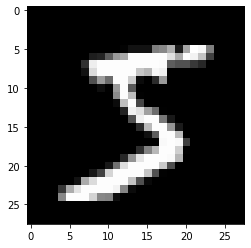

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


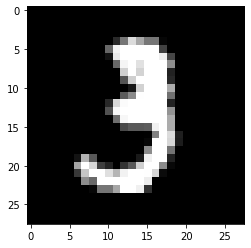

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


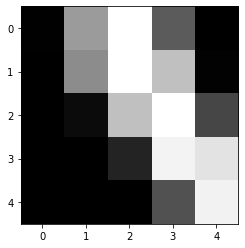

In [13]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [14]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)


batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

for images, labels in train_loader:
    print(labels)
    print(images.shape)
    break

tensor([9, 6, 3, 4, 5, 7, 0, 5, 7, 1, 5, 4, 4, 7, 3, 1, 5, 2, 1, 7, 4, 8, 8, 6,
        6, 0, 7, 2, 9, 4, 3, 5, 9, 8, 4, 0, 1, 0, 0, 8, 7, 4, 6, 7, 4, 8, 2, 7,
        3, 8, 6, 0, 0, 4, 7, 7, 8, 9, 1, 9, 9, 4, 4, 3, 9, 8, 7, 9, 7, 8, 8, 3,
        8, 9, 8, 6, 3, 5, 6, 9, 1, 4, 9, 1, 3, 0, 0, 4, 7, 7, 2, 1, 0, 2, 0, 8,
        9, 1, 6, 1, 6, 0, 0, 4, 3, 4, 1, 2, 2, 4, 9, 4, 2, 4, 2, 7, 2, 1, 0, 4,
        9, 9, 1, 6, 4, 9, 1, 0])
torch.Size([128, 1, 28, 28])


In [15]:
images.shape

torch.Size([128, 1, 28, 28])

In [16]:
images.reshape(128, 784).shape

torch.Size([128, 784])

## Modelling

In [80]:
import torch.nn.functional as F

In [23]:
input_size, num_classes = 28*28, 10
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [82]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 512)
        self.linear2 = nn.Linear(512, 256)
        self.out = nn.Linear(256, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear1(xb)
        out = self.linear2(out)
        out = self.out(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [21]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [84]:
history = fit(50, 1e-3, model, train_loader, val_loader)

Epoch [0], val_loss: 2.2059, val_acc: 0.4322
Epoch [1], val_loss: 2.1120, val_acc: 0.6210
Epoch [2], val_loss: 2.0059, val_acc: 0.6812
Epoch [3], val_loss: 1.8816, val_acc: 0.7056
Epoch [4], val_loss: 1.7377, val_acc: 0.7181
Epoch [5], val_loss: 1.5798, val_acc: 0.7261
Epoch [6], val_loss: 1.4205, val_acc: 0.7338
Epoch [7], val_loss: 1.2732, val_acc: 0.7451
Epoch [8], val_loss: 1.1455, val_acc: 0.7617
Epoch [9], val_loss: 1.0383, val_acc: 0.7781
Epoch [10], val_loss: 0.9498, val_acc: 0.7921
Epoch [11], val_loss: 0.8768, val_acc: 0.8051
Epoch [12], val_loss: 0.8162, val_acc: 0.8143
Epoch [13], val_loss: 0.7658, val_acc: 0.8231
Epoch [14], val_loss: 0.7233, val_acc: 0.8288
Epoch [15], val_loss: 0.6870, val_acc: 0.8345
Epoch [16], val_loss: 0.6557, val_acc: 0.8389
Epoch [17], val_loss: 0.6287, val_acc: 0.8442


KeyboardInterrupt: ignored

## Testing with individual images

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

## Saving and loading the model

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model.state_dict()

In [ ]:
model2 = MnistModel()

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

## Model4VS9

In [17]:
ds_4v9 = [(img, lbl) for (img, lbl) in dataset if lbl in [4, 9]]
relableDs_4v9 = []
len(ds_4v9)

11791

In [18]:
for i, (image, label) in enumerate(ds_4v9):
    #print(label)
    #print(image.shape)
    if label == 4:
      relableDs_4v9.append((image, 0))
    if label == 9:
      relableDs_4v9.append((image, 1))
len(relableDs_4v9)

11791

In [19]:
train_4v9, test_4v9 = random_split(relableDs_4v9, [10000, 1791])
# train_4v9, test_4v9 = random_split(ds_4v9, [10000, 1791])

len(train_4v9), len(test_4v9)


batch_size = 128

train4v9_loader = DataLoader(train_4v9, batch_size, shuffle=True)
test4v9_loader = DataLoader(test_4v9, batch_size)

for i, (images, labels) in enumerate(train4v9_loader):
    print(labels)
    print(images.shape)
    break


tensor([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0])
torch.Size([128, 1, 28, 28])


In [20]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader

class Binary_Classifier(nn.Module): 
    def __init__(self):
        super(Binary_Classifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(500, 1024)
        self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model4v9 = Binary_Classifier()


In [30]:
#model=Binary_Classifier()
#criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters(),lr = 0.1)

In [24]:
history_4v9 = fit(50, 1e-3, model4v9, train4v9_loader, test4v9_loader)

Epoch [0], val_loss: 0.0412, val_acc: 0.9855
Epoch [1], val_loss: 0.0333, val_acc: 0.9905
Epoch [2], val_loss: 0.0328, val_acc: 0.9905
Epoch [3], val_loss: 0.0375, val_acc: 0.9900
Epoch [4], val_loss: 0.0269, val_acc: 0.9905
Epoch [5], val_loss: 0.0324, val_acc: 0.9905
Epoch [6], val_loss: 0.0254, val_acc: 0.9916
Epoch [7], val_loss: 0.0264, val_acc: 0.9905
Epoch [8], val_loss: 0.0281, val_acc: 0.9939
Epoch [9], val_loss: 0.0288, val_acc: 0.9916
Epoch [10], val_loss: 0.0237, val_acc: 0.9916
Epoch [11], val_loss: 0.0243, val_acc: 0.9922
Epoch [12], val_loss: 0.0286, val_acc: 0.9894
Epoch [13], val_loss: 0.0234, val_acc: 0.9933
Epoch [14], val_loss: 0.0254, val_acc: 0.9939
Epoch [15], val_loss: 0.0247, val_acc: 0.9916
Epoch [16], val_loss: 0.0346, val_acc: 0.9911
Epoch [17], val_loss: 0.0302, val_acc: 0.9905
Epoch [18], val_loss: 0.0207, val_acc: 0.9944
Epoch [19], val_loss: 0.0233, val_acc: 0.9916
Epoch [20], val_loss: 0.0211, val_acc: 0.9922
Epoch [21], val_loss: 0.0205, val_acc: 0.992

In [25]:
torch.save(model4v9.state_dict(), 'mnist-logistic-4vs9.pth')

## Model 6 VS 9

In [ ]:
ds_6v9 = [(img, lbl) for (img, lbl) in dataset if lbl in [6, 9]]
relableDs_6v9 = []
len(ds_6v9)

11791

In [ ]:
for i, (image, label) in enumerate(ds_6v9):
    #print(label)
    #print(image.shape)
    if label == 6:
      relableDs_6v9.append((image, 0))
    if label == 9:
      relableDs_6v9.append((image, 1))
len(relableDs_6v9)

11791

In [ ]:
train_6v9, test_6v9 = random_split(relableDs_6v9, [10000, 1791])
len(train_6v9), len(test_6v9)


batch_size = 128

train6v9_loader = DataLoader(train_6v9, batch_size, shuffle=True)
test6v9_loader = DataLoader(test_6v9, batch_size)

for i, (images, labels) in enumerate(train6v9_loader):
    print(labels)
    print(images.shape)
    break


tensor([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1])
torch.Size([128, 1, 28, 28])


In [ ]:
model6v9 = Binary_Classifier()
history_6v9 = fit(50, 1e-3, model6v9, train6v9_loader, test6v9_loader)